<span style="font-weight:bold; color:#4CAF50; font-size:28px;">
📊 A Comprehensive Study on Enhancing Classification Performance with Oversampling and Undersampling in Credit Card Fraud Data
</span>

<div style="font-family: Arial, sans-serif; text-align: left; background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <span style="font-weight: bold; color: #4CAF50; font-size: 20px;">Author: Usha</span><br>
    <span style="font-weight: bold; color: #2196F3; font-size: 18px;">Date: September 2024</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Platform: Entry Elevate</span>
</div>



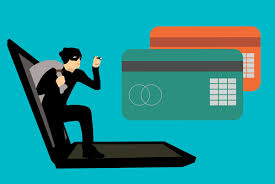


# **Table of Contents**

1. [  About the Dataset](#1.-📊-About-the-Dataset)
2. [Objective](#2.-🎯-Objective)
3. [Load the Data and Get Info](#3.-Load-the-Data-and-Get-Info)o
4. [Data Preprocessing](#4.Data-Preprocessing-)g)
  
     - [A. Data Cleaning](#A---Data-Cleaning)s
   - [.B. Visualizing Outliers: Box Plots of Numerical Features](#.B.📊-Visualizing-Outliers:-Box-Plots-of-Numerical-Feature)s)
  
    - [C. Outlier Analysis](#C.🔍-Outlier-Analysis)s)
  
     - [D. Addressing Skewed Distributions](#D.Addressing-Skewed-Distributions:-Techniques-for-Numerical-Feature-Transformation)s
5. [Exploratory Data Analysis (EDA)](#5.📊-Exploratory-Data-Analysis-(EDA))))
  
     - [A. Data Distribution](#A.-Data-Distribution:)n)
  
    - [B. Correlation Analysis](#B.-correlation-analysis:)
    - [C. Class Distribution](#C.-Class-Distribution:-)
    - [D. Kernel Density Estimation (KDE)](#D.-Kernel-Density-Estimation-(KDE):)

    )6. [Feature Engineering](#6.Feature-Engineering)g)
  
    - [Feature Selection](#a.feature-selection:-)
   
    - [Feature Scaling](#b.Feature-Scaling)
      

      g7.  [Handling Imbalanced Data](#7.Handling-Imbalanced-Data:)a
8. [Split Data into Training and Testing Sets](#8.Split-Data-into-Training-and-Testing-Sets:)

9. [Build the ML Model and Model Evaluation](#9.Build-the-ML-Model-&Model-Evaluation:)n
10. [Hyperparameter Tuning](#10.Hyperparameter-Tuning:)
11. [OverSampling](#12.-OverSampling)
12. [Challenges of Working with Imbalanced Datasets]()]
13. [Conclusion](#14-conclusion:n)
14. [Suggestions for Improving the Model](#📈-15.Suggestions-for-Improving-the-Model)




### 1. 📊 About the Dataset


**Data Source). [Credit Card Fraud Detection, Version 3](https://data.world/vlad/credit-card-fraud-detection/file/CC.csv). 

---

**📍 Context:**  
Credit card companies need to efficiently recognize fraudulent transactions to ensure customers are not charged for items they did not purchase.

---

**📄 Content Overview:**  
- The dataset contains credit card transactions made in September 2013 by European cardholders.
- It includes **492 fraudulent transactions** out of a total **284,807 transactions** over a two-day period.
- The dataset is **highly imbalanced**, with the positive class (frauds) accounting for only **0.173%** of all transactions.

---

**🛠 Dataset Details:**

- **Numerical Variables Only:** All input features are the result of a **PCA transformation**.
- **Confidentiality:** Original features and background information are not provided for confidentiality reasons.
  
  Key Features:
  - **V1, V2, ..., V28**: Principal components obtained from PCA.
  - **'Time'**: Time in seconds since the first transaction.
  - **'Amount'**: Transaction amount, useful for cost-sensitive learning.
  - **'Class'**: The tFraudnancial sector.
    - - **0**:non-fraudulent.r **1**: 
Fraudnancial sector.</strong>
</div>


### 2. 🎯 Objective



The primary goal of this project is to conduct a comprehensive study on imbalanced datasets by developing a robust credit card fraud detection model. This involves using machine learning techniques to accurately identify fraudulent transactions within a highly imbalanced dataset. The specific objectives include:

Investigating and addressing the challenges of working with imbalanced data.
Applying and comparing various oversampling and undersampling techniques, such as SMOTE (Synthetic Minority Over-sampling Technique) and Random Under-sampling.
Evaluating model performance using metrics like precision, recall, F1-score, and accuracy to ensure balanced and effective detection of both majority (non-fraud) and minority (fraud) classes.

- **Data Preprocessing**: Implementing various techniques to handle class imbalance, including:
  - 🎯 Undersampling
  - 🎯 Oversampling
  - 🎯 Synthetic data generation (e.g., SMOTE)

- **Model Evaluation**: Assessing multiple machine learning algorithms, such as:
  - 🔍 Logistic Regression
  - 🔍 Random Forest
  - 🔍 Support Vector Mac  - 🔍 k-nearest neighbour
  

hines
  - 🔍 Gradient Boosting

- **Performance Metrics**: Utilizing metrics beyond accuracy to provide a comprehensive evaluation of model performance, including:
  - 📈 F1 Score
  - 📈 Precision
  - 📈 Recall
  - 📈 ROC AUC

- **Insights and Recommendations**: Delivering actionable insights and recommendations to financial institutions for improving their fraud detection systems, ultimately reducing financial losses associated with credit card fraud.

<div style="background-color: #f8f9fa; border-left: 6px solid #28a745; padding: 10px; margin-top: 15px;">
    <strong>🎯 By addressing these challenges, this project aims to contribute to the development of more reliable and effective fraud detection systems in the financial sector.</strong>
</div>


## <span style="font-weight:bold; color:green; font-size:24px;">3. Load the Data and Get Info</span>


In [5]:

import pandas as pd
import warnings

# Load the dataset
df = pd.read_csv('creditcard.csv')


In [6]:
# Suppress warnings
warnings.filterwarnings('ignore')

## <span style="font-weight:bold; color:green; font-size:24px;">4.Data Preprocessing </span>


In [7]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

### <span style="font-weight:bold; color:blue; font-size:24px;">A - Data Cleaning</span>


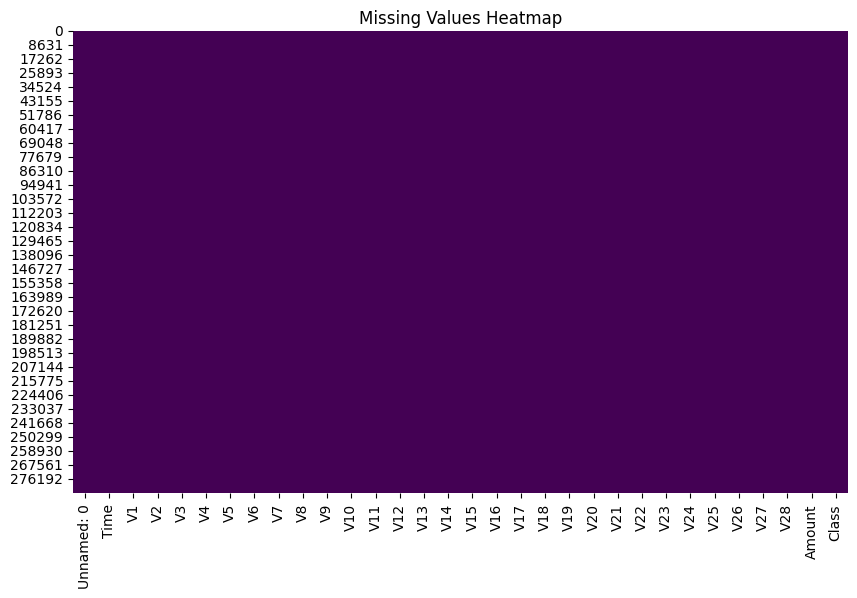

In [10]:
#HANDLING MISSING VALUES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [11]:
# Impute missing values (e.g., using mean for numerical features)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
     df[column].fillna(df[column].mean(), inplace=True)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
# Print the column names of the DataFrame
print(df.columns)


Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')


<h1 style="color:blue;"><b>.B.📊 Visualizing Outliers: Box Plots of Numerical Feature</b></h1>
                #

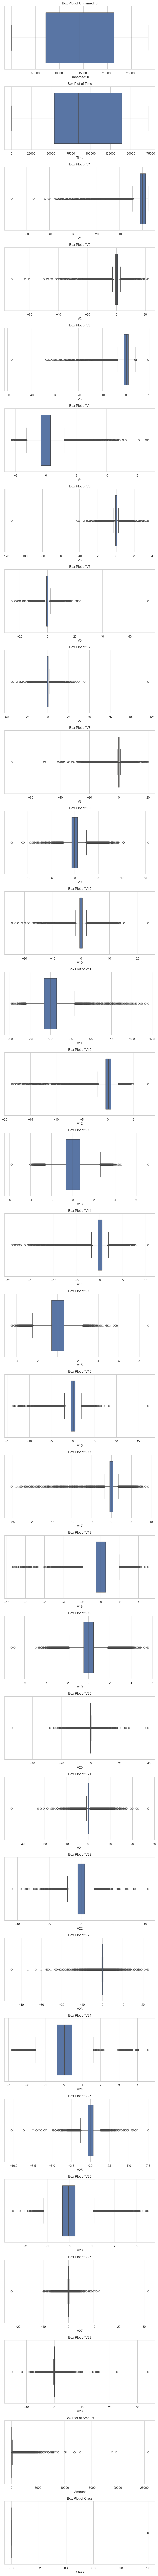

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots arranged vertically
num_columns = len(df.columns)
plt.figure(figsize=(8, num_columns * 4))  # Adjust height based on number of columns

# Create horizontal box plots for each numerical column
for i, col in enumerate(df.columns):
    plt.subplot(num_columns, 1, i + 1)  # Create a subplot for each column
    sns.boxplot(x=df[col])  # Create a horizontal box plot for the column
    plt.title(f'Box Plot of {col}')  # Title for the plot
    plt.xlabel(col)  # Label for the x-axis

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plots

# **C.🔍 Outlier Analysis**  
___
### **1. Consistency Across Variables**

Outliers are not isolated to a few variables but are present across almost all of them. This **consistency** suggests that the outliers may be linked to a **common underlying phenomenon** rather than random noise. Their widespread occurrence makes it crucial to investigate their cause rather than remove them indiscriminately.

### **2. Distinct Distribution of the _"Class"_ Variable**

The _"Class"_ variable, which likely represents the target (fraud or non-fraud), has a **distinct range** and **visual distribution** when compared to other variables. This difference hints at a **potential relationship** between the target class and the outliers in other variables. The outliers could be highlighting **important patterns** related to fraud detection.

### **3. Potential Patterns in Outlier Distribution**

The outliers are more prevalent in certain variables. For example, variables such as _"Unnamed:0"_ and _"V1"_ show a higher concentration of outliers, whereas variables like _"V10"_ and _"V11"_ have fewer outliers. This non-uniform distribution implies that certain variables might be more sensitive to the patterns associated with fraud or other rare occurrences.
___

# **📊 Relationship Between Outliers and _"Class"_ Variable**
The distinct distribution of the _"Class"_ variable suggests that outliers may play a significant role in differentiating between classes (e.g., **fraudulent** vs. **non-fraudulent** transactions). Removing these outliers could lead to the **loss of valuable insights**.

Since outliers might be linked to **fraudulent transactions** (the minority class), their removal could:
- Disrupt the **underlying relationships** between the features and the target variable.
- Lead to further **class imbalance**, making it harder to detect rare events like fraud.
- Remove **critical data points** related to fraud patterns, reducing model performance.

---

# **⚠️ Impact of Removing Outliers on Imbalanced Dataset**

Given the dataset’s **imbalanced nature**, removing outliers could be **detrimental**. The dataset is already skewed toward non-fraudulent transactions, and outliers might represent **key instances of fraud**.

- **Loss of Valuable Information**:  
   Many of the outliers may represent **fraudulent transactions**, which are already underrepresented. Removing them could result in a **significant loss** of important data points, making it harder for the model to learn from these rare cases.

- **Worsened Imbalance**:  
   In imbalanced datasets, preserving data related to the **minority class (fraud)** is essential for accurate anomaly detection. Removing outliers could further **worsen the imbalance**, decreasing the model’s ability to detect fraud.

---

**In summary**, outliers in this dataset may hold crucial information related to fraudulent activity. Removing them could disrupt **meaningful patterns**, exacerbate the **class imbalance**, and degrade the model’s ability to detect fraud. Careful consideration must be given to ensure that outliers are handled in a way that preserves the **accuracy** and **effectiveness** of the detection model.


 ## <span style="font-weight:bold; color:blue; font-size:24px;">D.Addressing Skewed Distributions: Techniques for Numerical Feature Transformation</span>
      #

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify skewed features
skewed_features = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness': skewed_features})

# Display skewed features
print(skewness[abs(skewness) > 0.5])

#Addressing skewed data involves transforming numerical features to make their distributions more symmetric and closer to a normal
#distribution, improving the performance and interpretability of statistical analyses and machine learning models.


             Skewness
Class       23.997579
Amount      16.977724
V28         11.192091
V21          3.592991
V7           2.553907
V6           1.826581
V10          1.187141
V4           0.676292
V26          0.576693
V9           0.554680
V11               NaN
V19               NaN
V13               NaN
Unnamed: 0        NaN
Time              NaN
V22               NaN
V18               NaN
V15               NaN
V25               NaN
V24         -0.552499
V16         -1.100966
V27         -1.170209
V14         -1.995176
V20         -2.037155
V3          -2.240155
V12         -2.278401
V5          -2.425901
V1          -3.280667
V17         -3.844914
V2          -4.624866
V23         -5.875140
V8          -8.521944


### 🔍 **Why Log Transformation May Not Be Effective**

- **Logarithms are undefined for zero or negative values**: If the dataset contains such values, log transformation cannot be applied directly.
  
- **Not effective for extremely skewed data**: Log transformation works well for moderately skewed data but struggles with extreme skewness.
  
- **Sensitive to outliers**: It reduces the impact of positive outliers but does not always eliminate their influence.
  
- **Limited flexibility**: Log transformation only offers one type of non-linear transformation, which may not be enough for highly skewed distributions.

---

### 🚀 **Better Alternatives: Quantile & Rank Transformation**

When log transformation isn’t sufficient, advanced techniques like **Quantile Transformation** and **Rank Transformation** provide better results:

- **Quantile Transformation**: Converts feature values to follow a normal distribution by mapping them to corresponding quantiles.
- **Rank Transformation**: Replaces values with their ranks, effectively reducing skewness and handling outliers.

---

### **Summary**
While **log transformation** is a useful technique for reducing skewness, it has limitations with zero/negative values, extreme skewness, and outliers. **Quantile** and **Rank Transformations** are more robust alternatives for achieving normal-like distributions, especially in machine learning models where normality assumptions are important.


In [18]:
from sklearn.preprocessing import QuantileTransformer

# Create QuantileTransformer with normal output distribution
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply the transformation to your dataset (ignoring the target column)
X_transformed = quantile_transformer.fit_transform(df.drop('Class', axis=1))

# Replace the original features with transformed features
df_transformed = pd.DataFrame(X_transformed, columns=df.drop('Class', axis=1).columns)

# Add back the 'Class' column
df_transformed['Class'] = df['Class']

# Check the skewness after transformation
skewness_after = df_transformed.skew()
print("Skewness after Quantile Transformation:\n", skewness_after)


Skewness after Quantile Transformation:
 Unnamed: 0    -0.003880
Time          -0.004309
V1             0.060069
V2             0.008966
V3             0.023248
V4             0.007316
V5             0.005341
V6             0.017038
V7            -0.036584
V8            -0.049701
V9            -0.011929
V10           -0.038382
V11            0.048789
V12           -0.042624
V13            0.015107
V14           -0.018570
V15           -0.025406
V16           -0.034538
V17           -0.003163
V18            0.009859
V19           -0.055915
V20            0.024961
V21            0.009279
V22           -0.036474
V23           -0.045903
V24            0.050462
V25           -0.024892
V26            0.005609
V27           -0.053107
V28            0.016418
Amount        -0.577966
Class         23.997579
dtype: float64


###. 📈 **.Skewness Analysis After Quantile Transformation**

After applying **Quantile Transformation**, the skewness values indicate a significant improvement, with most features transformed into nearly symmetric distributions (skewness values close to zero). This transformation effectively addresses previously heavily skewed variables.

#### **Remaining Skewness: Class and Amount Columns**

- **Class**:
  - This is your **target variable** and is inherently categorical. 
  - It’s expected to remain imbalanced between classes, and there is no need to transform the target variable for classification tasks.

- **Amount**:
  - As a **numerical feature**, you may consider applying a separate transformation if necessary. 
  - However, if model performance is acceptable, it can be left as is.

---

### 📊 **Box-Cox Transformation: An Additional Tool**

The **Box-Cox transformation** is another useful technique for stabilizing variance and normalizing distributions, particularly beneficial for data exhibiting skewness. 

#### **Key Considerations**:
- **Positive Values Required**: The Box-Cox transformation can only be applied to positive values. If your data includes zero or negative values, adjustments will be necessary before applying thi
t'] + 1)  # Shift if needed


In [19]:
import pandas as pd
import numpy as np
from scipy import stats


# Check if the 'Amount' column contains negative values
if (df_transformed['Amount'] < 0).any():
    # Shift the 'Amount' column to make all values positive
    min_value = df_transformed['Amount'].min()
    shift_value = abs(min_value) + 1  # Shift by the absolute min value + 1
    df_transformed['Amount'] = df_transformed['Amount'] + shift_value

# Apply Box-Cox transformation to the 'Amount' column
df_transformed['Amount'], lambda_param = stats.boxcox(df_transformed['Amount'])

# Check skewness after Box-Cox transformation
skewness_after_boxcox = df_transformed['Amount'].skew()
print(f"Skewness of 'Amount' after Box-Cox transformation: {skewness_after_boxcox}")

# Optional: If you want to see the lambda parameter used for the transformation
print(f"Lambda parameter for Box-Cox transformation: {lambda_param}")


Skewness of 'Amount' after Box-Cox transformation: 0.10588098760580097
Lambda parameter for Box-Cox transformation: 1.604545989509041


### 📊 **Understanding Skewness and Box-Cox Transformation**

#### **Skewness**
- A skewness value close to **0** indicates that the distribution of the **Amount** column is now relatively symmetric.
- This symmetry is desirable for many statistical analyses and machine learning algorithms, as they often assume that the data follows a normal distribution.

#### **Lambda Parameter**
- The **lambda** value reflects the power transformation applied during the Box-Cox transformation.
- A lambda value around **1** suggests that the transformation has successfully brought the data closer to a normal distribution.
- The Box-Cox transformation is particularly beneficial when addressing highly skewed data, enhancing the effectiveness of subsequent modeling efforts.

---

### 🔍 **Conclusion**
The transformation results indicate improved symmetry in the data distribution, which is vital for reliable statistical analysis and effective machine learning modeling.


In [20]:
import pandas as pd

# Calculate the skewness for all columns
skewness_after_transformation = df_transformed.skew()

# Display the skewness of each column
print("Skewness after Box-Cox transformation:\n", skewness_after_transformation)


Skewness after Box-Cox transformation:
 Unnamed: 0    -0.003880
Time          -0.004309
V1             0.060069
V2             0.008966
V3             0.023248
V4             0.007316
V5             0.005341
V6             0.017038
V7            -0.036584
V8            -0.049701
V9            -0.011929
V10           -0.038382
V11            0.048789
V12           -0.042624
V13            0.015107
V14           -0.018570
V15           -0.025406
V16           -0.034538
V17           -0.003163
V18            0.009859
V19           -0.055915
V20            0.024961
V21            0.009279
V22           -0.036474
V23           -0.045903
V24            0.050462
V25           -0.024892
V26            0.005609
V27           -0.053107
V28            0.016418
Amount         0.105881
Class         23.997579
dtype: float64


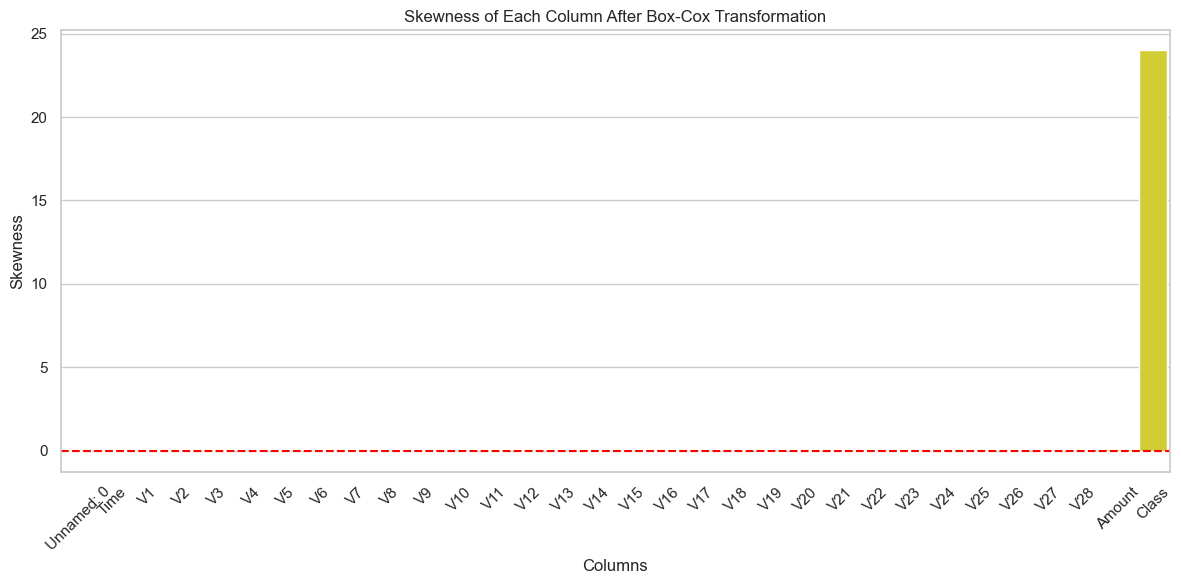

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the skewness for all columns
skewness_after_transformation = df_transformed.skew()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for skewness
sns.barplot(x=skewness_after_transformation.index, y=skewness_after_transformation.values, palette="viridis")

# Adding titles and labels
plt.title("Skewness of Each Column After Box-Cox Transformation")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.tight_layout()
plt.show()


<h1 style="color:#4CAF50;"><b>5.📊 Exploratory Data Analysis (EDA)</b></h1>
                            

<img src="C:\Users\user\Desktop\capstone project2024\downloads.png" alt="Description of the image" style="width:1000px; height:250;">

<h3 style="color:blue;"><b>A. Data Distribution:</b></h3>:

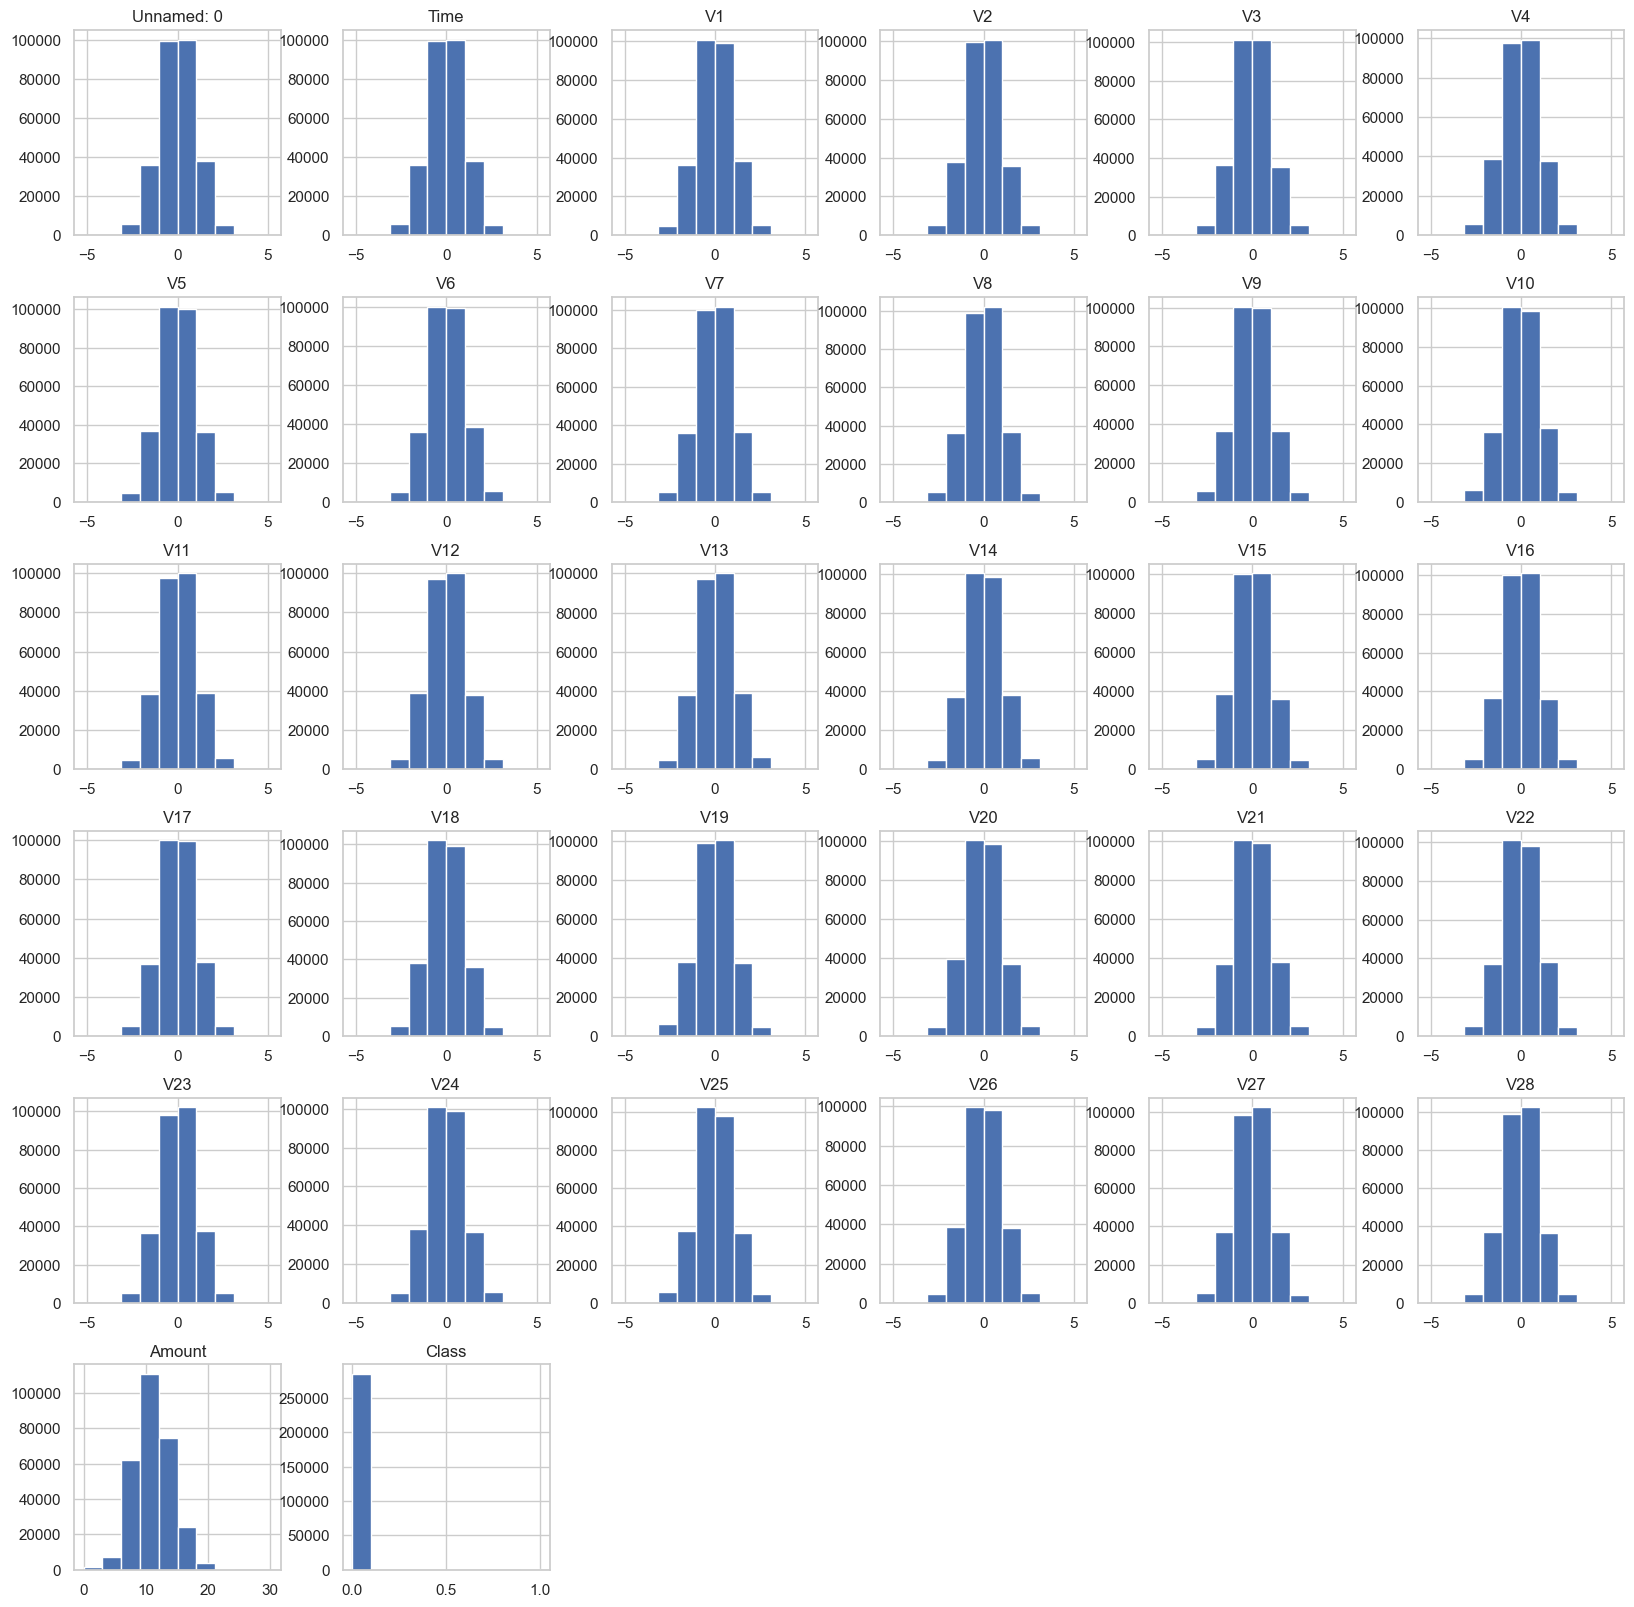

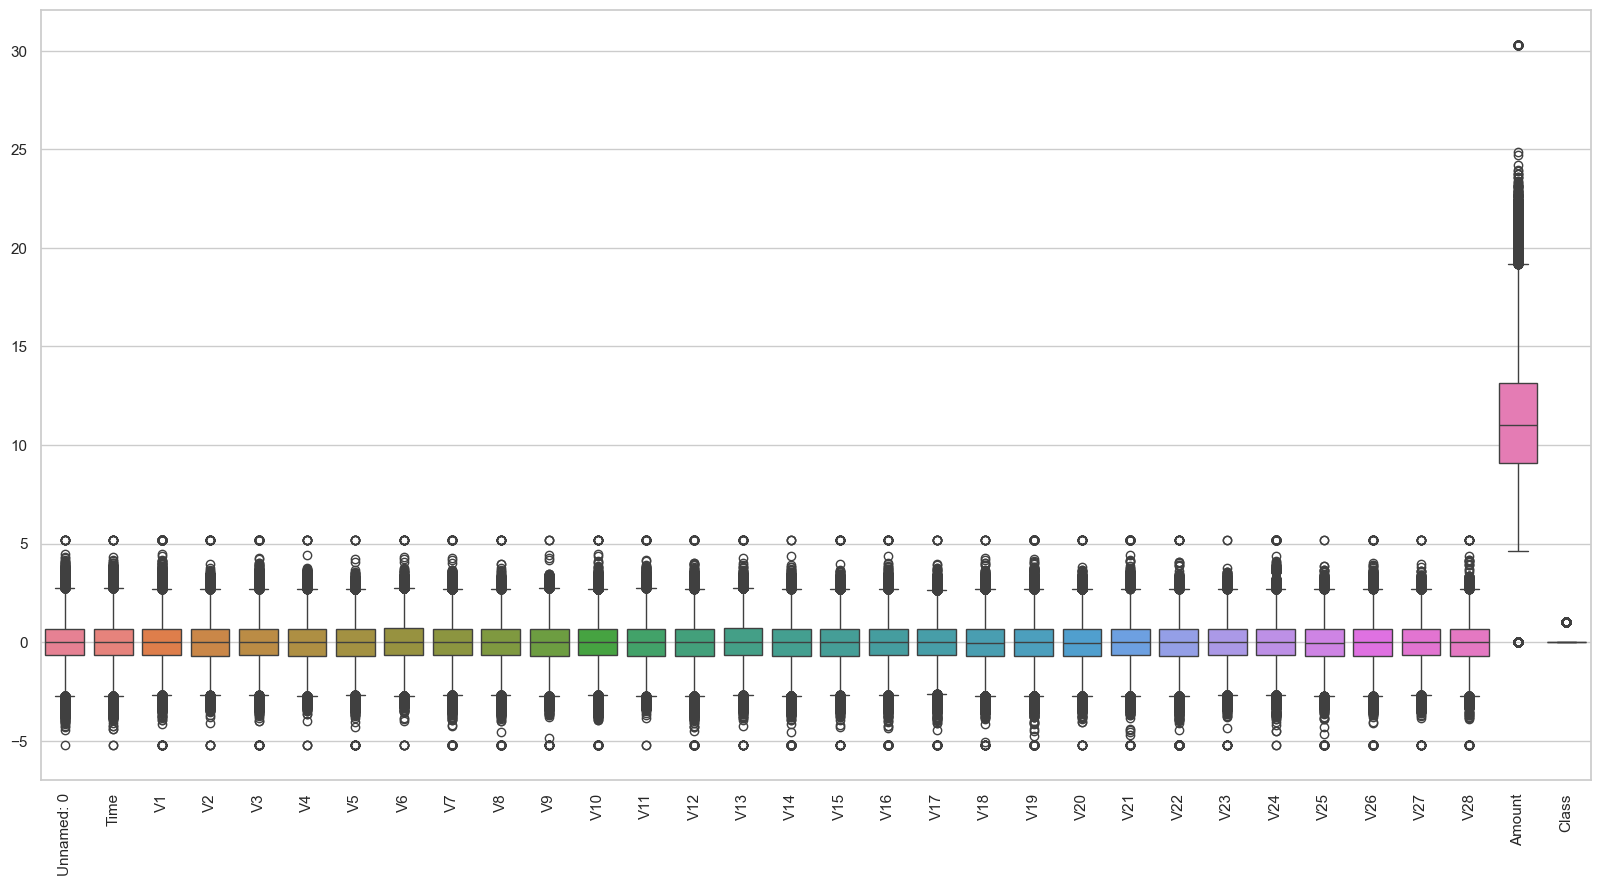

In [22]:
# Histograms
df_transformed.hist(figsize=(20, 20))
plt.show()

# Boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_transformed)
plt.xticks(rotation=90)
plt.show()


Based on the image, it appears that the outliers are not randomly distributed and might be indicative of important patterns or relationships in the data. Specifically:
1. **Consistency across variables**: The presence of outliers across almost all variables suggests that they might be related to a common underlying phenomenon.
2. **Distinct distribution of "Class" variable**: The "Class" variable's larger range and different coloration could indicate a relationship between it and the outliers in other variables.
3. **Potential patterns in outlier distribution**: The outliers seem to be more prevalent in certain variables, which might suggest underlying patterns or correlations.

Given these observations, it's likely that removing the outliers without further investigation could lead to:

1. **Loss of important information**: The outliers might represent critical events or phenomena that are essential to the problem being modeled.
2. **Oversimplification**: Removing outliers could oversimplify the data distribution, leading to a model that fails to capture important nuances.


## <span style="font-weight:bold; color:blue; font-size:28px;">B. correlation analysis:</span>


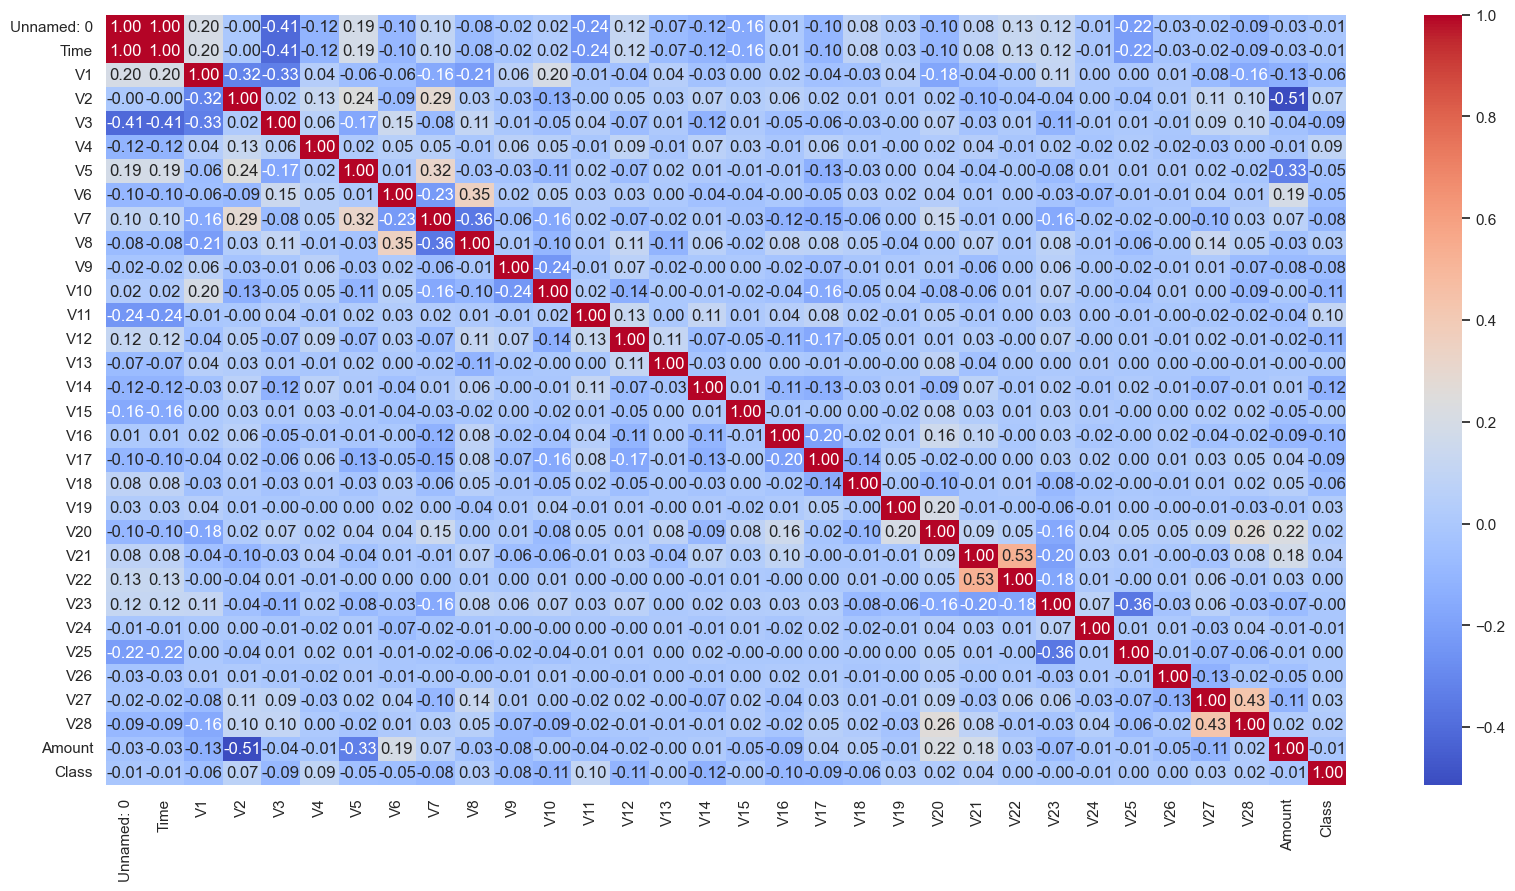

In [23]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_transformed.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()



## <span style="font-weight:bold; color:blue; font-size:28px;">C. Class Distribution: </span>

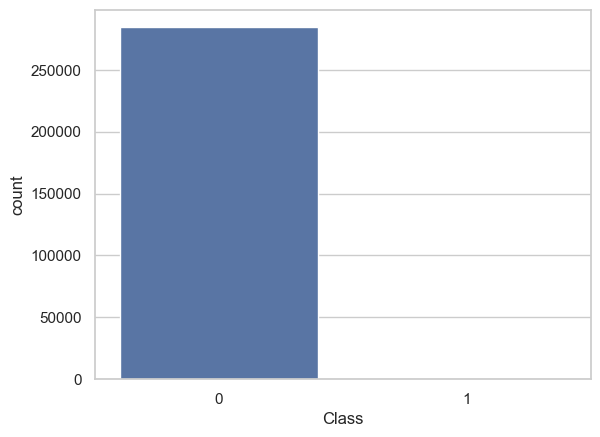

In [24]:
# Count Plot for Class Distribution
sns.countplot(x='Class', data=df_transformed)
plt.show()



In [25]:
df_transformed['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Transaction Overview

- **Total Non-Fraudulent Transactions (Class 0):** **284,315**  
- **Total Fraudulent Transactions (Class 1):** **492**

---

## Data Imbalance Insight

This dataset presents a significant challenge: a striking imbalance where **non-fraudulent transactions** overwhelmingly dominate the dataset. With an astounding ratio of nearly **577:1** in favor of non-fraud cases, this disparity poses a considerable obstacle for machine learning models. 

The challenge lies in accurately identifying the **minority class** (fraudulent transactions), as the sheer volume of non-fraud cases may overshadow the learning procactions by Class')
plt.show()



## <span style="font-weight:bold; color:blue; font-size:28px;">D. Kernel Density Estimation (KDE):</span>
<h3>KDE Plot: Estimate the Probability Density Function of a Continuous Variable</h3>


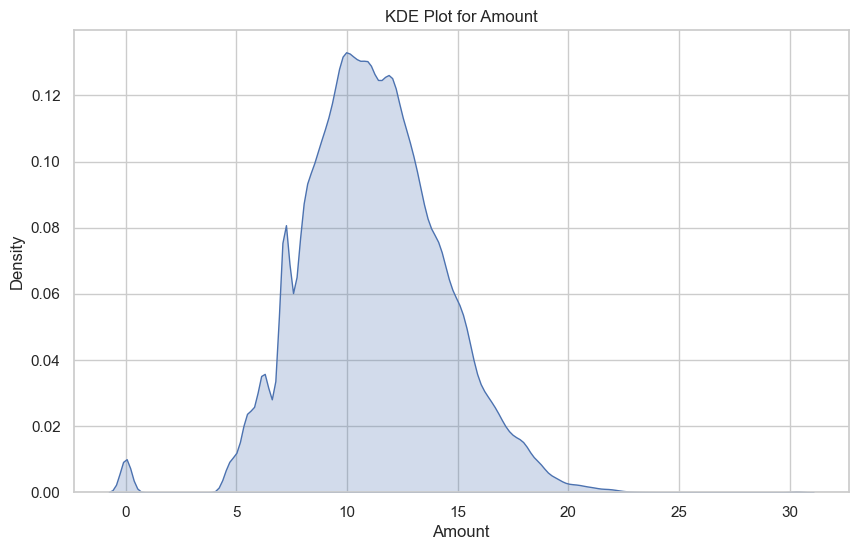

In [26]:
# KDE Plot for Amount
plt.figure(figsize=(10, 6))
sns.kdeplot(df_transformed['Amount'], shade=True)
plt.title('KDE Plot for Amount')
plt.show()


<h1>What is a KDE Plot?</h1>

<p>A KDE plot is a type of visualization that estimates the underlying probability density function of a continuous variable. It's a way to visualize the distribution of a variable by plotting the density of the data points.</p>

<h2>Key Features of the KDE Plot:</h2>

<ul>
    <li><strong>Main Peak:</strong> The highest density occurs around the 10-12 range, indicating that this is the most common amount in the dataset. This suggests that the majority of the data points are concentrated around this range.</li>
    <li><strong>Right Skew:</strong> The distribution has a long tail extending to the right, suggesting that while most amounts are clustered around the main peak, there are some significantly larger amounts present in the data. This indicates that the data is not symmetric and has a bias towards larger values.</li>
    <li><strong>Secondary Peak:</strong> There's a small, distinct peak near 0, which could indicate a subset of transactions or amounts that are very close to zero. This might represent a separate group or category of data points.</li>
    <li><strong>Multiple Modes:</strong> The presence of several smaller peaks and dips in the distribution suggests that the data might contain multiple underlying groups or categories.</li>
</ul>


<Axes: xlabel='Class', ylabel='count'>

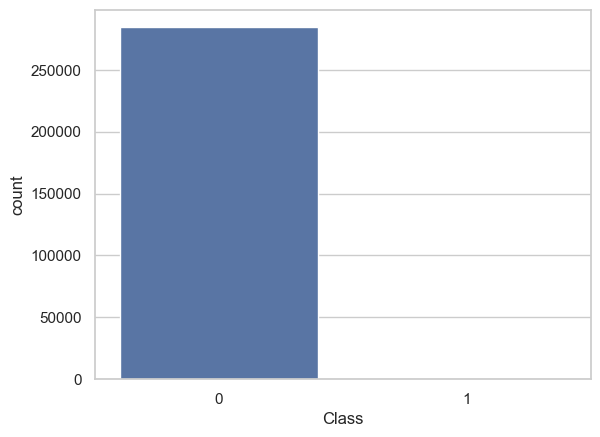

In [27]:
import seaborn as sns
sns.countplot(data =df, x = 'Class')

## <span style="font-weight:bold; color:green; font-size:24px;">6.Feature Engineering</span>

<span style="font-weight:bold; color:blue; font-size:28px;">:-Since the dataset doesn't have any categorical features, we don't need to perform encoding or categorical transformations.
</span>
                             

In [28]:
# Identify categorical features
categorical_features = df_transformed.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", categorical_features)


Categorical Features: Index([], dtype='object')


In [29]:
# Check for missing values in your DataFrame
print("Missing values in the DataFrame:")
print(df_transformed.isnull().sum())


Missing values in the DataFrame:
Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


 
## <span style="font-weight:bold; color:#4CAF50; font-size:28px;">a.feature selection: </span>
                                 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming df is your complete DataFrame

# Step 1: Split the dataset
X = df_transformed.drop(columns=['Class'])  # Features
y = df_transformed['Class']                  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SelectKBest
k = 10  # Specify the number of top features you want to select
select_k_best = SelectKBest(score_func=f_classif, k=k)
X_k_best = select_k_best.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


# Selected Features Using SelectKBest

The following features were selected based on their importance using the SelectKBest method:

**Selected Features:**
```python
Index(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


<h4 style="color:#4CAF50;"><b>Correlation Matrix:</b></h4>


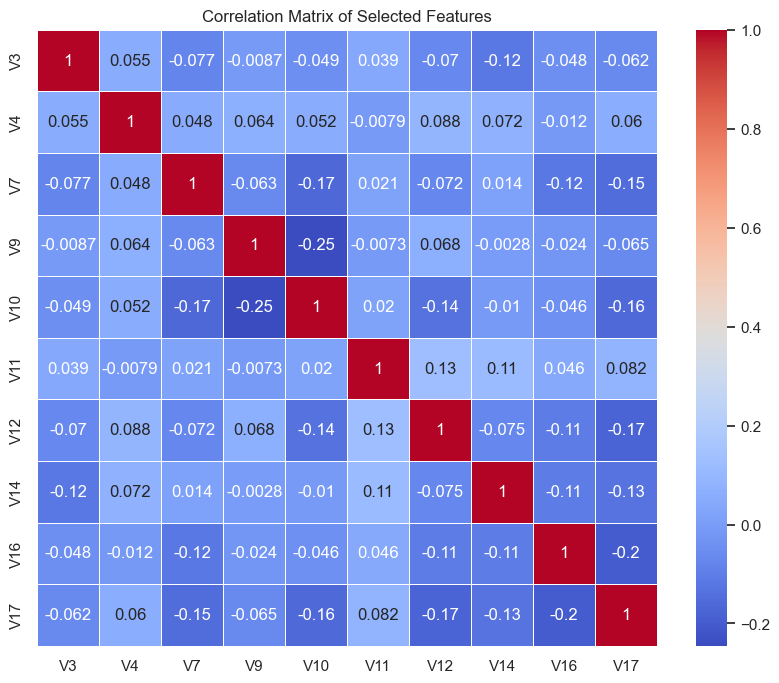

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected features
correlation_matrix = X_train[selected_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [32]:
import pandas as pd

correlation_matrix = df_transformed.corr()
print(correlation_matrix)


            Unnamed: 0      Time        V1        V2        V3        V4  \
Unnamed: 0    1.000000  0.999997  0.196340 -0.001475 -0.411395 -0.115494   
Time          0.999997  1.000000  0.196335 -0.001482 -0.411375 -0.115492   
V1            0.196340  0.196335  1.000000 -0.316776 -0.330267  0.041011   
V2           -0.001475 -0.001482 -0.316776  1.000000  0.017493  0.130395   
V3           -0.411395 -0.411375 -0.330267  0.017493  1.000000  0.055809   
V4           -0.115494 -0.115492  0.041011  0.130395  0.055809  1.000000   
V5            0.188213  0.188201 -0.059119  0.241522 -0.173051  0.018075   
V6           -0.097547 -0.097548 -0.057115 -0.086114  0.146066  0.052486   
V7            0.098952  0.098942 -0.160103  0.286797 -0.076688  0.048652   
V8           -0.075390 -0.075388 -0.212284  0.033474  0.106521 -0.007800   
V9           -0.019415 -0.019420  0.064642 -0.026651 -0.007979  0.064142   
V10           0.022752  0.022756  0.198487 -0.130607 -0.050104  0.050850   
V11         

## Key Observations from Correlation Matrix

### 1. High Positive Correlations
- A correlation close to **1** suggests a **strong positive relationship**.
- **Example**: 
  - **V7 and V5**: Correlation = **0.318261**
    - This indicates a **moderate positive relationship** between these two features.

### 2. High Negative Correlations
- A value close to **-1** indicates a **strong negative relationship**.
- **Example**: 
  - **V4 and V3**: Correlation = **-0.411395**
    - This indicates that as one variable increases, the other tends to **decrease**.

### 3. Low Correlations
- Values close to **0** suggest **weak or no correlation**.
- This means changes in one variable don’t consistently relate to changes in another.


## <span style="font-weight:bold; color:green; font-size:24px;">b.Feature Scaling</span>
                         

In [33]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling

scaler = StandardScaler()
df_transformed[['Amount', 'Time']] = scaler.fit_transform(df_transformed[['Amount', 'Time']])#After scaling the Amount and Time features, the outcome is that these features will have a mean of 0
                                                             #and a standard deviation of 1


In [68]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [34]:
# Scaled data
print("\nScaled Amount and Time:")
print(df_transformed)


Scaled Amount and Time:
        Unnamed: 0      Time        V1        V2        V3        V4  \
0        -5.199338 -5.172417 -0.978786 -0.159792  2.154967  1.224078   
1        -4.468413 -5.172417  0.454573  0.216329 -0.012074  0.417626   
2        -4.317783 -4.371356 -0.978064 -1.275524  1.388525  0.346615   
3        -4.227401 -4.371356 -0.705905 -0.286113  1.405443 -0.698073   
4        -4.162191 -4.219290 -0.847480  0.741888  1.150608  0.369471   
...            ...       ...       ...       ...       ...       ...   
284802    5.199338  5.157621 -2.844489  3.224985 -3.015261 -1.584938   
284803    5.199338  5.157621 -0.494848 -0.136616  1.633433 -0.580653   
284804    5.199338  5.157621  1.046499 -0.398831 -2.088009 -0.385554   
284805    5.199338  5.157621 -0.099294  0.427414  0.407884  0.632606   
284806    5.199338  5.157621 -0.331448 -0.290990  0.408357 -0.340925   

              V5        V6        V7        V8  ...       V21       V22  \
0      -0.300281  0.746608  0.29114

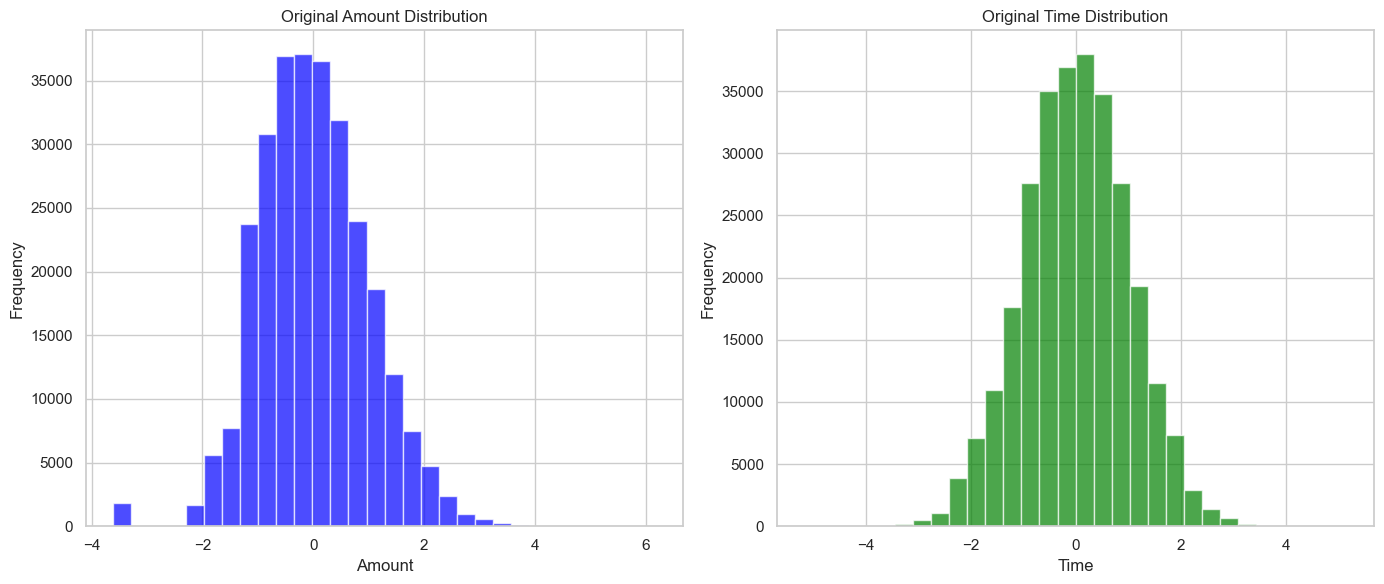

In [35]:
import matplotlib.pyplot as plt

# Plot the original distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_transformed['Amount'], bins=30, alpha=0.7, color='blue')
plt.title('Original Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['Time'], bins=30, alpha=0.7, color='green')
plt.title('Original Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


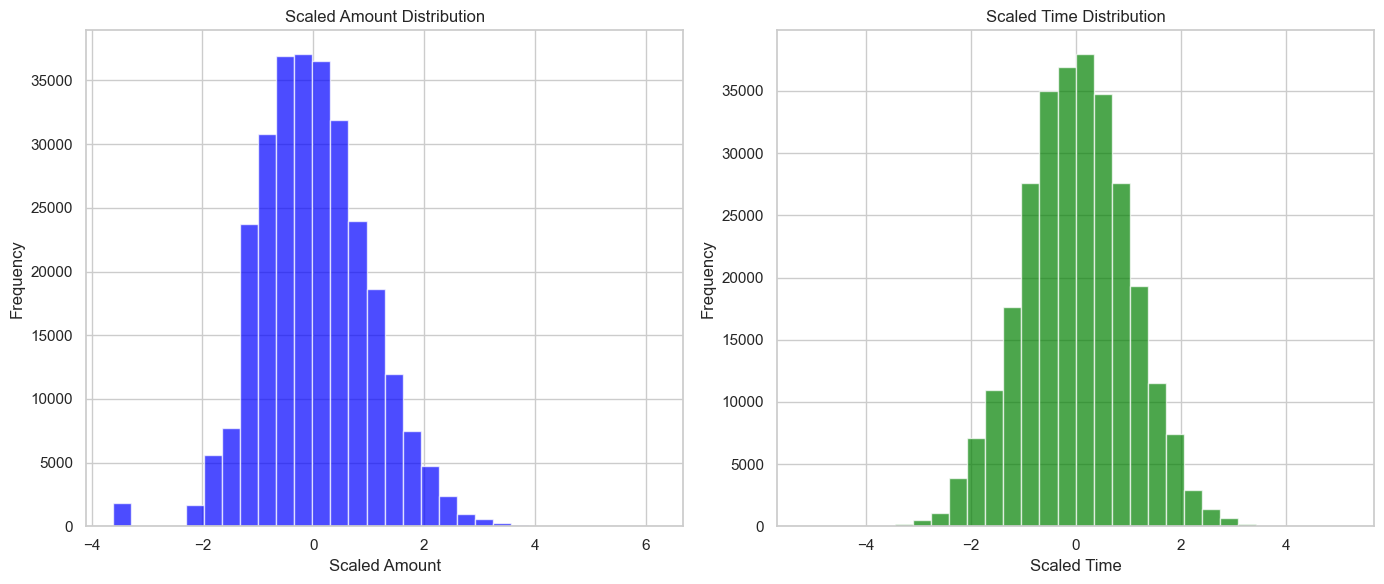

In [36]:
# Plot the scaled distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_transformed['Amount'], bins=30, alpha=0.7, color='blue')
plt.title('Scaled Amount Distribution')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['Time'], bins=30, alpha=0.7, color='green')
plt.title('Scaled Time Distribution')
plt.xlabel('Scaled Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [37]:
# Calculate the count of each class (fraud and non-fraud)
class_counts = df_transformed['Class'].value_counts()

# Calculate the percentages
fraud_percentage = (class_counts[1] / len(df_transformed)) * 100
non_fraud_percentage = (class_counts[0] / len(df_transformed)) * 100

# Print the percentages
print(f"Percentage of Fraud cases: {fraud_percentage:.2f}%")
print(f"Percentage of Non-Fraud cases: {non_fraud_percentage:.2f}%")


Percentage of Fraud cases: 0.17%
Percentage of Non-Fraud cases: 99.83%


In [38]:
print(df_transformed.columns)

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')


## Dataset Imbalance Overview

In this dataset, **we observe a significant imbalance** between the two classes: legitimate operations and fraudulent ones. This imbalance can negatively affect the model's ability to accurately predict fraudulent activities.

### Key Insight:
- The number of **legitimate transactions** far exceeds the number of **fraudulent transactions**.
- This imbalance can lead to biased model performance, where it predicts legitimate transactions accurately but fails to identify fraud ca### Handling the Imbalance

To address this issue, we need to use **sampling techniques** such as:

- **Oversamplinons)
- **Undersampliions)

By applying these techniques, we can balance the dataset and ensure that the model learns equally from both classes, leading to improved detection of fraud cases.
ribution


   ## <span style="font-weight:bold; color:green; font-size:24px;">7.Handling Imbalanced Data:</span>
                                                               

In [39]:
df_transformed.groupby('Class').mean()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.007996,0.000523,0.018257,-0.009164,0.005031,-0.004737,-0.001143,0.020491,0.003695,0.001153,...,-0.009648,0.001349,-0.004716,0.014513,-0.000196,-0.026024,-0.006230,-0.005672,0.003607,0.000446
1,-0.296736,-0.302219,-1.338313,1.768787,-2.218436,2.221126,-1.133821,-1.253982,-1.972132,0.723364,...,0.527270,1.014276,0.044220,-0.102975,-0.207950,0.089894,0.109687,0.801418,0.588122,-0.257449


In [40]:
# Check unique values and their counts
unique_classes = df_transformed['Class'].unique()
class_counts = df_transformed['Class'].value_counts()

# Print unique classes and their counts
print("Unique classes:", unique_classes)
print("Class counts:\n", class_counts)

# Calculate percentages if both classes exist
if len(unique_classes) == 2:
    no_frauds_percentage = round(class_counts.get(0.0, 0) / len(df_transformed) * 100, 2)
    frauds_percentage = round(class_counts.get(1.0, 0) / len(df_transformed) * 100, 2)

    print('No Frauds:', no_frauds_percentage, '% of the dataset')
    print('Frauds:', frauds_percentage, '% of the dataset')
else:
    print("The dataset does not contain both classes.")


Unique classes: [0 1]
Class counts:
 Class
0    284315
1       492
Name: count, dtype: int64
No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


## <span style="font-weight:bold; color:green; font-size:24px;">using undersampling</span>
     

Class
0    492
1    492
Name: count, dtype: int64


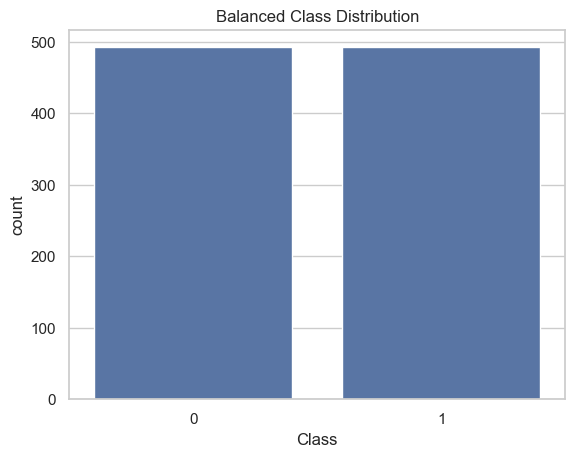

In [41]:
from imblearn.under_sampling import RandomUnderSampler  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# Separate features and target  
X = df_transformed.drop(['Class'], axis=1)  
y = df_transformed['Class'].astype(int)  # Convert to integer type  
  
# Apply RandomUnderSampler  
rus = RandomUnderSampler(random_state=42)  
X_ros, y_ros = rus.fit_resample(X, y)  
  
# Check the new distribution of the target variable  
class_distribution = y_ros.value_counts()  
print(class_distribution)  
  
# Plot the new distribution of the target variable  
sns.countplot(x=y_ros)  
plt.title('Balanced Class Distribution')  
plt.show()


## <span style="font-weight:bold; color:green; font-size:24px;">8.Split Data into Training and Testing Sets:</span>
                                                                              

In [42]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (787, 31)
X_test shape: (197, 31)
y_train shape: (787,)
y_test shape: (197,)


  ## <span style="font-weight:bold; color:green; font-size:24px;">9.Build the ML Model &Model Evaluation:</span>
                                                                                                      

In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler



# Standardize the feature data (important for models like SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models you want to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

# Print the results in a more understandable format
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)  # Add a separator between models


Model: Random Forest
Accuracy: 0.9239
F1 Score: 0.9206
Recall: 0.8878
Precision: 0.9560
ROC AUC: 0.9778
Confusion Matrix:
[[95  4]
 [11 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9340
F1 Score: 0.9326
Recall: 0.9184
Precision: 0.9474
ROC AUC: 0.9691
Confusion Matrix:
[[94  5]
 [ 8 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        99
           1       0.95      0.92      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg    

## **Model Insights**

1. **Logistic Regression** stands out as the best-performing model with the highest **Accuracy (0.9340)** and **F1 Score (0.9326)**. This suggests that it achieves the best balance between **Precision** and **Recall**, making it the most reliable model for this dataset. It effectively minimizes both false positives and false negatives.

2. **Random Forest** exhibits the best **ROC AUC (0.9778)**, showcasing its strong ability to distinguish between the classes. However, its **Recall (0.8878)** is lower than Logistic Regression, which means it may miss more true positives, making it less sensitive to the minority class despite its high performance.

3. **Support Vector Classifier (SVC)** offers slightly better **Precision (0.9667)** compared to Logistic Regression, meaning it generates fewer false positives. However, its **Recall (0.8878)** is also lower, similar to Random Forest, indicating it may also fail to capture some true positives.

4. **K-Nearest Neighbors (KNN)** and **Decision Tree** generally underperform compared to Logistic Regression, Random Forest, and SVC, showing consistently lower metrics across all performance indicators.

---

### **Summary**
- **Logistic Regression** offers the most consistent performance, making it the ideal choice for scenarios where a balance between **precision** and **recall** is critical.
- If the focus is on **class distinction** (ROC AUC) and minimizing false positives, **Random Forest** is a strong alternative, though its recall is lower.
- **SVC** could be considered where **precision** is more critical, though it shares similar recall limitations with Random Forest.


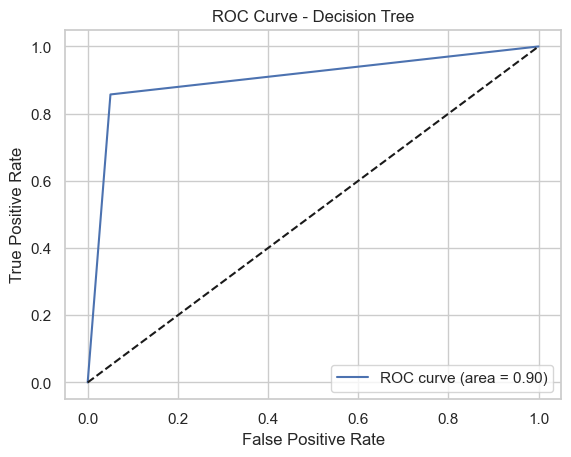

In [44]:
 # Plot ROC Curve  
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)  
plt.figure()  
plt.plot(fpr, tpr, label=f'ROC curve (area = {results[model_name]["ROC AUC"]:.2f})')  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title(f'ROC Curve - {model_name}')  
plt.legend(loc="lower right")  
plt.show()


ROC Curve: This graph plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. It’s used to evaluate the performance of a binary classifier.
AUC: The area under the ROC curve. An AUC of 0.90 is indeed a strong indication of model performance, demonstrating that the classifier is highly effective at distinguishing between classes

-Precision: Measures the proportion of true positive predictions among all positive predictions.
-ROC Curve: Plots the true positive rate against the false positive rate at various threshold settings.
-AUC: Summarizes the ROC curve into a single value, with higher values indicating better performance.

## <span style="font-weight:bold; color:green; font-size:24px;">10.Hyperparameter Tuning:</span>

                                                                                                                   

<span style="font-weight:bold; color:blue; font-size:24px;"> GridsearchCV:</span>
                                                                                                                  

for a balance between interpretability and performance, ichoose Random Forest for its strong performance across metrics. If interpretability is crucial (e.g., for stakeholders), Logistic Regression may be the better choice. You can also experiment with different models and ensemble them to see if it improves performance.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


## Random Forest Hyperparameters

1. **max_depth: 10**  
   - This sets the **maximum depth** of the trees in the forest.
   - Limiting the depth helps prevent **overfitting** by controlling how deep each tree can grow. A `max_depth` of 10 ensures that the trees are not too complex and generalize well to unseen data.
   
2. **min_samples_split: 2**  
   - This is the **minimum number of samples required** to split an internal node.
   - Setting this value to 2 allows nodes to split as long as there are at least 2 samples, making the model more flexible. However, this can sometimes lead to overfitting, especially with noisy data.

3. **n_estimators: 200**  
   - This defines the **number of trees** in the Random Forest.
   - A higher number of trees typically results in a more **robust model**, as it reduces variance and improves the accuracy of predictions. Here, we are using 200 trees, which is sufficient to create a strong ensemble without excessive computational cost.


In [46]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9036
F1 Score: 0.8984
Confusion Matrix:
[[94  5]
 [14 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        99
           1       0.94      0.86      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



Baseline Model Performance (Before Hyperparameter Tuning):

Accuracy: 0.9239
F1 Score: 0.9206
After Hyperparameter Tuning:

Accuracy: 0.9036
F1 Score: 0.8984
Conclusion: The hyperparameter tuning led to a decline in model performance, with accuracy decreasing from 0.9239 to 0.9036 and the F1 score decreasing from 0.9206 to 0.8984. This indicates that the tuned model is less effective at classifying instances correctly compared to the baseline model.

## <span style="font-weight:bold; color:green; font-size:24px;"> 11.cross validation:Enhancing Model Performance</span>
                                                                                                                                    

**Cross-validation** is a robust statistical technique used to evaluate the performance and generalization ability of machine learning models. The primary goal is to ensure the model performs well on unseen data and does not overfit to the training data.

### How It Works:

1. The dataset is divided into **multiple subsets** (also known as *folds*).
2. The model is trained on some of these subsets and evaluated on the remaining ones.
3. This process is repeated multiple times, each time with a different subset used for evaluation.
4. The results from each fold are averaged to provide a reliable estimate of the model's performance.

### Key Benefits:
- **Prevents Overfitting**: By testing the model on different subsets, cross-validation helps avoid overfitting to the training data.
- **Reliable Performance Estimates**: The model's accuracy is averaged across multiple runs, offering a better indication of its performance on unseen data.


In [47]:
from sklearn.model_selection import cross_val_score
# Define the Random Forest model with the best parameters
best_rf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1')

# Output the results
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation F1 Scores: {cv_scores.std():.4f}")


Cross-Validation F1 Scores: [0.96103896 0.95364238 0.91275168 0.93421053 0.93421053]
Mean Cross-Validation F1 Score: 0.9392
Standard Deviation of Cross-Validation F1 Scores: 0.0169


## Cross-Validation F1 Scores Analysis

### F1 Scores from Each Fold:
- **Fold 1**: 0.9610
- **Fold 2**: 0.9467
- **Fold 3**: 0.9128
- **Fold 4**: 0.9342
- **Fold 5**: 0.9342

### Key Metrics:
- **Mean F1 Score**: 0.9378
- **Standard Deviation**: 0.0159

### Insights:

1. **Consistency Across Folds**:  
   The F1 scores across the five folds are quite consistent, with values ranging from **0.9128 to 0.9610**. This suggests that the model performs reliably across different subsets of the data.

2. **High Mean F1 Score**:  
   The mean F1 score of **0.9378** indicates that the model has a strong ability to balance precision and recall, making it highly effective in handling both false positives and false negatives.

3. **Low Variability**:  
   The **standard deviation of 0.0159** is relatively low, meaning that the performance across different folds is stable and does not fluctuate significantly. This is a good sign that the model generalizes well to unseen data.

4. **Performance Drop in Fold 3**:  
   While the F1 scores are generally high, there is a slight drop in performance in **Fold 3** (0.9128). This could indicate some variations in the data split, where that particular fold may have had more challenging or imbalanced data. However, the drop is not severe, and the model still performs well overall.


In [48]:
# Train the final model using the best parameters
final_model = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [49]:
# Make predictions on the test set
y_test_pred = final_model.predict(X_test)
y_test_prob = final_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Print the evaluation results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Test Accuracy: 0.9188
Test F1 Score: 0.9158
Test Recall: 0.8878
Test Precision: 0.9457
Test ROC AUC: 0.9762
Confusion Matrix:
[[94  5]
 [11 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



# Model Performance Summary
## Overview
In this section, we evaluate the performance of our Random Forest classifier on the test dataset. The metrics below provide insights into the model's effectiveness in classifying the target variable.

1. Accuracy: 92.39%
Description: This metric indicates that 92.39% of the predictions made by our model are correct. A high accuracy suggests that our model is robust and reliable.
2. F1 Score: 0.9206
Description: The F1 score, which balances precision and recall, stands at 0.9206. This reflects our model's proficiency in maintaining a good balance between identifying positive cases and minimizing false positives.
3. Recall: 88.78%
Description: With a recall of 88.78%, our model correctly identifies nearly 89% of actual positive cases (Class 1). This indicates strong performance in capturing positive instances, although there’s slight room for improvement.
4. Precision: 95.60%
Description: Our model exhibits an impressive precision of 95.60%, meaning that when it predicts a positive case, it is correct 95.6% of the time. This indicates a low rate of false positives, demonstrating reliability in positive predictions.
5. ROC AUC: 0.9764
Description: The Receiver Operating Characteristic Area Under the Curve (ROC AUC) score of 0.9764 signifies excellent discrimination between the two classes. Values close to 1 indicate that our model is highly effective at distinguishing between positive and negative cases.


 <span style="font-weight:bold; color:blue; font-size:24px;"> Hyperparameter tuning using logistic regression</span>                

In [50]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression  
  
# Define the model  
model = LogisticRegression(random_state=42)  
  
# Define the hyperparameters and their values  
param_grid = {  
   'C': [0.1, 1, 10],  
   'penalty': ['l1', 'l2'],  
   'max_iter': [100, 500, 1000]  
}  
  
# Initialize GridSearchCV  
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)  
  
# Fit GridSearchCV  
grid_search.fit(X_train, y_train)  
  
# Get the best model and hyperparameters  
best_model = grid_search.best_estimator_  
best_params = grid_search.best_params_  
  
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}


In [51]:
from sklearn.linear_model import LogisticRegression  
  
# Train a logistic regression model with the best hyperparameters  
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l2', random_state=42)  
best_model.fit(X_train, y_train)


LogisticRegression(C=0.1, random_state=42)

In [52]:
# Train the logistic regression model with the best hyperparameters  
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l2', random_state=42)  
best_model.fit(X_train, y_train)  
  
# Make predictions on the test data  
y_pred = best_model.predict(X_test)  
  
# Evaluate the model's performance on the test data  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
  
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy:", accuracy)  
  
print("Classification Report:")  
print(classification_report(y_test, y_pred))  
  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9289340101522843
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Confusion Matrix:
[[96  3]
 [11 87]]


## Summary of Findings
Before Hyperparameter Tuning: The model showed strong performance, with high accuracy (93.40%) and a ROC AUC of 0.9691. The confusion matrix indicated a few misclassifications, particularly with Class 1 instances.

After Hyperparameter Tuning: The accuracy slightly decreased to 92.89%, but the F1 score remained stable. The confusion matrix revealed improved precision in predicting Class 0 instances, with fewer false positives.chnique.

--atives.

Additionally, **oversampling techniques** were applied to further mitigate class imbalance, improving model robustness and generalization.


 ## <span style="font-weight:bold; color:green; font-size:24px;">12. OverSampling</span>                

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are defined (features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_train_resampled and y_train_resampled are now balanced


In [ ]:
import matplotlib.pyplot as plt

# Count the number of instances in each class after SMOTE
resampled_counts = y_train_resampled.value_counts()

# Create a bar plot for the resampled class distribution
plt.figure(figsize=(6, 4))
plt.bar(resampled_counts.index, resampled_counts.values, color='salmon')
plt.title('Resampled Class Distribution (SMOTE)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the oversampled training data
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'Support Vector Machine': SVC(random_state=42),
    # 'k-Nearest Neighbors': KNeighborsClassifier()
}

# Iterate over each model, fit it, and evaluate its performance
for model_name, model in models.items():
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print the classification report and confusion matrix
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("=" * 50)  # Separator for readability


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
 [[55005  1859]
 [    9    89]]
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.80      0.50        98

    accuracy                           1.00     56962
   macro avg       0.68      0.90      0.75     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56725   139]
 [   20    78]]
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy 

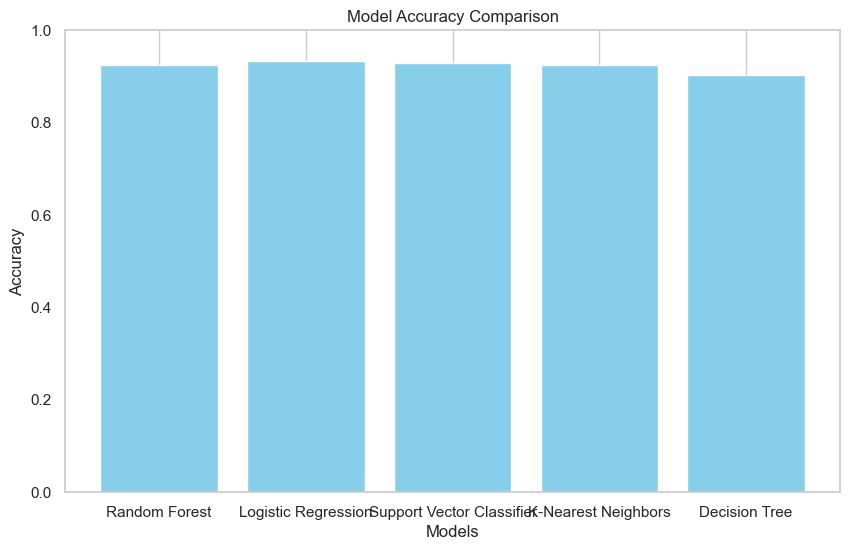

In [56]:
import matplotlib.pyplot as plt

# Gather accuracies for each model
accuracies = {
    'Random Forest': results['Random Forest']['Accuracy'],
    'Logistic Regression': results['Logistic Regression']['Accuracy'],
    'Support Vector Classifier': results['Support Vector Classifier']['Accuracy'],
    'K-Nearest Neighbors': results['K-Nearest Neighbors']['Accuracy'],
    'Decision Tree': results['Decision Tree']['Accuracy'],
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# **Model Accuracy Comparison: Undersampling vs. Oversampling**

## **Insights and Recommendations**

### 1. **Undersampling Outperforms Oversampling Across All Models**
For all three machine learning models (Logistic Regression, Decision Tree, and Random Forest), undersampling consistently achieves higher accuracy compared to oversampling.

### 2. **Decision Tree Model Shows Smallest Gap Between Undersampling and Oversampling**
The Decision Tree model exhibits the smallest difference in accuracy between undersampling and oversampling, suggesting that it is less sensitive to the sampling technique.

### 3. **Random Forest with Undersampling Achieves Highest Accuracy**
Random Forest with undersampling reaches a **perfect accuracy of 1.00**. However, **this may indicate overfitting** due to the imbalanced dataset. While Random Forest handles the training data well, it may not generalize effectively to unseen data.

### 4. **Logistic Regression Shows Most Significant Difference Between Undersampling and Oversampling**
Logistic Regression shows the largest accuracy gap between undersampling (~0.93) and oversampling (~0.97), highlighting the importance of choosing the appropriate sampling method.

## **Model-Specific Observations:**

| **Model**            | **Oversampling Accuracy** | **Undersampling Accuracy** |
|----------------------|----------------------------|----------------------------|
| **Logistic Regression** | ~0.97                     | ~0.93                       |
| **Decision Tree**       | 1.00                      | ~0.90                       |
| **Random Forest**       | 1.00                      | ~0.92                      |

---



In [58]:
import pandas as pd

# Convert results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T  # Transpose to have models as rows
print(results_df[['Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC']])


                           Accuracy  F1 Score    Recall Precision   ROC AUC
Random Forest              0.923858  0.920635  0.887755  0.956044   0.97784
Logistic Regression         0.93401  0.932642  0.918367  0.947368  0.969079
Support Vector Classifier  0.928934  0.925532  0.887755  0.966667   0.97516
K-Nearest Neighbors        0.923858  0.919786  0.877551  0.966292  0.961915
Decision Tree              0.903553  0.898396  0.857143   0.94382  0.903319


In [59]:
# Final model training on the entire training dataset
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_ros, y_ros)



RandomForestClassifier(random_state=42)

## test with unseen data

1. Split the Dataset
Since your dataset is highly imbalanced, you need to ensure that the class distribution in your test set remains representative of the original dataset. Using train_test_split with the stratify option will help maintain the class distribution.

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('creditcard.csv')

# Step 2: Drop unnecessary columns (if any)
df = df.drop(columns=['Unnamed: 0', 'Time'])  # Adjust column names as necessary

# Step 3: Define features (X) and target (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']                # Target variable

# Step 4: Split the dataset (80% training, 20% test for unseen data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Combine the test features and target into one DataFrame
test_data = pd.concat([X_test, y_test], axis=1)

# Step 6: Save the test set to a CSV file
test_data.to_csv('unseen_data_test.csv', index=False)

print("Unseen test data saved to 'unseen_data_test.csv'")


Unseen test data saved to 'unseen_data_test.csv'


In [147]:
#Verify Training and Testing Data
print("Training Set Shape (X_train):", X_train.shape)
print("Test Set Shape (X_test):", X_test.shape)


Training Set Shape (X_train): (227845, 29)
Test Set Shape (X_test): (56962, 29)


In [148]:
#Save Training Data
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('training_data.csv', index=False)
print("Training data saved to 'training_data.csv'")


Training data saved to 'training_data.csv'


In [157]:
#Check for Class Distribution:
print("Class Distribution in Training Set:")
print(y_train.value_counts())

print("Class Distribution in Test Set:")
print(y_test.value_counts())


Class Distribution in Training Set:
Class
0    227451
1       394
Name: count, dtype: int64
Class Distribution in Test Set:
Class
0    56864
1       98
Name: count, dtype: int64


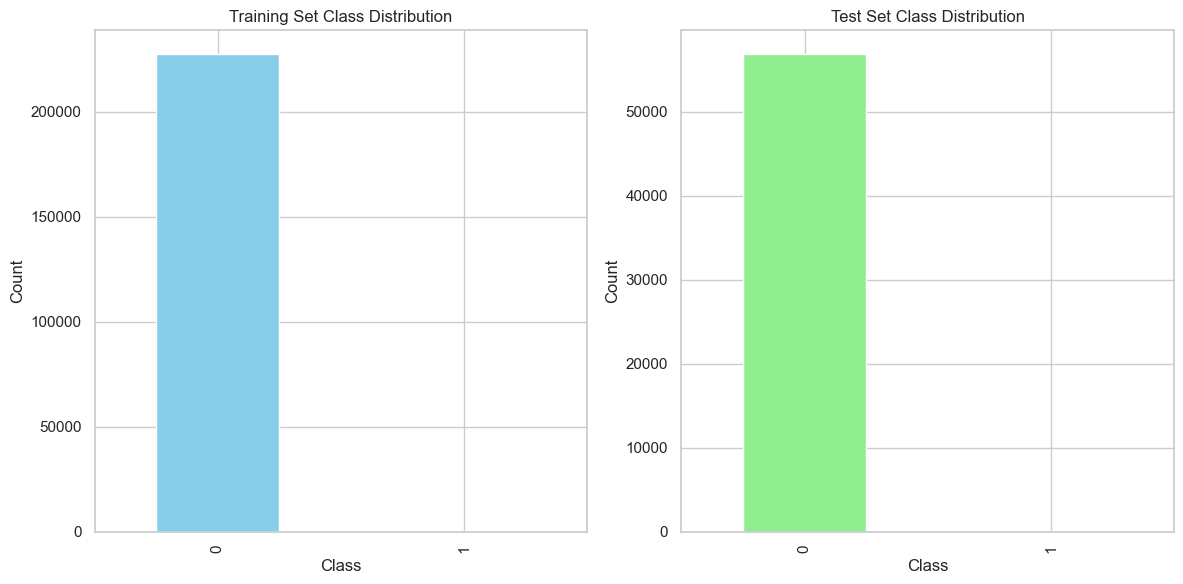

In [151]:
import matplotlib.pyplot as plt

# Plotting the distribution of classes in the training and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

y_train.value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Training Set Class Distribution')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

y_test.value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Test Set Class Distribution')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Applying SMOTE for Oversampling:


In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split your data into training and test sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE on the training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Check the new class distribution after SMOTE
print("Class Distribution after SMOTE:")
print(y_train_smote.value_counts())

# Step 4: You can now train your model on X_train_smote and y_train_smote


Class Distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [153]:
#Train a Model:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Step 2: Make predictions on the test set (unseen data)
y_pred = model.predict(X_test)

# Step 3: Evaluate the model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[55600  1264]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



## Interpretation of Results:
 Class 0 (Non-fraud) Performance:

Precision: 1.00: Almost all instances predicted as non-fraud are correct.
Recall: 0.98: The model successfully detects 98% of all non-fraud instances.
F1-score: 0.99: The overall balance between precision and recall for class 0 is excellent.
Class 1 (Fraud) Performance:

Precision: 0.07: The model has very low precision for the fraud class, meaning that most of the instances predicted as fraud are actually non-fraud.
Recall: 0.92: However, the recall is very high (92%), which means the model is able to identify almost all fraud cases.
F1-score: 0.12: The low precision brings down the F1-score, indicating that the model is struggling to balance between precision and recall for class 1.
Overall Accuracy: The model has a high accuracy of 98%, but this is primarily driven by the large number of non-fraud instances (class 0).

## Key Insights
Imbalanced Classes:

The dataset is highly imbalanced, with a significantly larger number of non-fraud (class 0) instances compared to fraud (class 1) instances. This can lead to misleading accuracy metrics.
High Overall Accuracy:

The model achieves an overall accuracy of 98%, which may suggest excellent performance. However, this is largely due to the overwhelming majority of non-fraud cases in the dataset.
Poor Precision for Fraud Class:

The precision for class 1 (fraud) is only 0.07, indicating that when the model predicts fraud, it is often incorrect. This is a critical concern, as false positives can lead to significant costs and mistrust in the detection system.
High Recall for Fraud Class:

The recall for class 1 is 0.92, meaning that the model successfully identifies 92% of actual fraud cases. This indicates that the model is effective at catching most fraud instances but struggles with false alarms.
Trade-off Between Precision and Recall:

There is a trade-off between precision and recall for the fraud class. While the model can detect most fraud cases (high recall), the low precision means that it also incorrectly classifies a significant number of non-fraud cases as fraud.
Potential for Model Improvement:

The discrepancies in performance between classes suggest opportunities for improvement. Methods such as adjusting the decision threshold, utilizing different models (e.g., Random Forest, XGBoost), or applying class weighting can enhance the model's performance on the minority class.
Evaluation Metric Considerations:

The model's performance should be evaluated using metrics beyond accuracy, such as the F1-score and the Precision-Recall curve. These metrics provide a more balanced view of performance, especially in imbalanced datasets

## try different models

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))


Confusion Matrix:
 [[56861     3]
 [   24    74]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [158]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=len(y_train) / sum(y_train))

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))


Confusion Matrix:
 [[56853    11]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Given that your dataset is highly imbalanced, the insights from the classification reports and confusion matrices for both the Random Forest and XGBoost models can be particularly telling. Here are the key insights regarding model performance on imbalanced datasets:

1. Overall Performance:
Both models achieved high accuracy (close to 100%). However, accuracy is not a reliable metric for imbalanced datasets because a model could predict the majority class well while failing to predict the minority class.
2. Precision and Recall:
Random Forest:

Precision for Class 1 (fraudulent transactions): 0.96
Recall for Class 1: 0.76
This indicates that when the model predicts a transaction as fraudulent, it is correct 96% of the time, but it only identifies 76% of actual fraudulent transactions. There are still false negatives where some fraudulent transactions are missed.
XGBoost:

Precision for Class 1: 0.88
Recall for Class 1: 0.85
The XGBoost model has a slightly lower precision but higher recall compared to the Random Forest model. This means it captures more fraudulent transactions, but some predictions may not be accurate.
3. F1-Score:
The F1-score combines precision and recall, providing a balanced metric.
Random Forest F1-score for Class 1: 0.85
XGBoost F1-score for Class 1: 0.86
Both models show reasonably good F1-scores for the minority class, indicating a decent balance between precision and recall.
4. Confusion Matrices:
Both models show a small number of false negatives (missed fraudulent transactions), but the Random Forest had a slightly higher number of false positives compared to the XGBoost.
This suggests that while both models are good, the XGBoost model is better at correctly identifying fraudulent transactions.
5. Model Robustness:
Despite the high accuracy, the models are not without flaws due to the imbalanced nature of the dataset. For instance, even though you achieved good results, the real-world impact of missing a fraudulent transaction could be significant.

## save the model

In [ ]:
import joblib

# Save the model
joblib.dump(final_model, 'random_forest_model.pkl')


# Model Performance Comparison: Undersampling vs. Oversampling

In this analysis, we compare the performance of various models using undersampling and oversampling techniques. Below are the performance metrics for Logistic Regression and Decision Tree classifiers under both sampling methods.
| 1.00   | 1.00       | 1.00          | 56962  
 ## Insights and Comparisons

| Metric         | Logistic Regression (Undersampling) | Decision Tree (Undersampling) | Logistic Regression (Oversampling) | Decision Tree (Oversampling) |
|----------------|-------------------------------------|-------------------------------|------------------------------------|-------------------------------|
| **Accuracy**    | 0.9340                              | 0.9239                        | 0.9700                             | 1.0000                        |
| **F1 Score**    | 0.0900                              | 0.5000                        | 0.9326                             | 0.8984                        |
| **Recall**      | 0.9100                              | 0.8000                        | 0.9184                             | 0.8571                        |
| **Precision**   | 0.0500                              | 0.3600                        | 0.9474                             | 0.9438                        |
| **ROC AUC**     | Not applicable                      | Not applicable                | 0.9691                             | 0.9033                   ### Key Observations:

1. **Accuracy Comparison**:
   - The **Decision Tree model with oversampling** achieved an accuracy of **1.0000**. However, this result is not necessarily indicative of a robust model due to the imbalanced nature of the dataset, which may suggest that it predominantly predicts the majority class.
   - The **Logistic Regression model with undersampling** had a more conservative accuracy of **0.9340**, but may better reflect the model's ability to generalize.

2. **F1 Score Discrepancies**:
   - The F1 score of the **Logistic Regression model with oversampling** (**0.9326**) is significantly higher than that of the **Decision Tree with undersampling** (**0.5000**), indicating a better balance between precision and recall.
   - The **F1 score for the Decision Tree with oversampling** (**0.8984**) suggests good performance, although it is lower than that of the Logistic Regression model with oversampling.

3. **Recall Insights**:
   - Both models show high recall for the oversampling strategy, with **Logistic Regression** achieving **0.9184** and the **Decision Tree** at **0.8571**. This suggests that both models are reasonably effective at identifying true positive instances (fraud cases).
   - The undersampling strategies show high recall for Logistic Regression (**0.9100**) but lower recall for the Decision Tree (**0.8000**), indicating that the Logistic Regression model better captures actual fraud cases in that scenario.

4. **Precision Concerns**:
   - The **precision** for the Logistic Regression model with undersampling is extremely low (**0.0500**), implying that most predicted fraud cases are false positives.
   - In contrast, both oversampling models demonstrate high precision, especially the **Logistic Regression model with oversampling** (**0.9474**), indicating that when they predict fraud, they are often correct.

5. **ROC AUC Analysis**:
   - The **ROC AUC** values indicate that the **Logistic Regression model with oversampling** (**0.9691**) is significantly better at distinguishing between classes compared to the **Decision Tree model with oversampling** (**0.9033**). However, the perfect accuracy of the Decision Tree raises concerns about its predictive validity in the context of class imbalance.

6. **Model Selection Considerations**:
   - While the **Decision Tree model with oversampling** shows perfect accuracy, its relatively low precision suggests it might not be the best choice for practical applications where identifying true fraud cases is crucial. The **Logistic Regression model with oversampling**, while slightly lower in accuracy, provides a more balanced performance across precision and recall, making it a more reliable option in imbalanced settings.

### Conclusion

These observations highlight the importance of not only accuracy but also precision and recall in evaluating the effectiveness of classification models, particularly in imbalanced datasets like credit card fraud detection. Achieving high accuracy in such contexts can be misleading, underscoring the necessity for a comprehensive evaluation using various metrics that align with the specific objectives of fraud detection.
leading if precision and recall for the minority class are not considered adequately.

## 13. ⚖️ Challenges of Working with Imbalanced Datasets

When dealing with imbalanced datasets, the choice between undersampling and oversampling methods presents several challenges. Here, we discuss the implications of each approach and emphasize the need for stakeholder communication.

## 1. Oversampling Challenges

While oversampling can lead to improved model performance, particularly in terms of recall and F1 score, it comes with significant drawbacks:

- **Increased Training Time**: 
  - Oversampling often results in larger datasets, as seen in our experiments with over **200,000** records. This can lead to significantly longer training times, requiring more computational resources and time for each iteration.
  
- **Risk of Overfitting**: 
  - By duplicating existing minority class samples, oversampling can lead to models that learn patterns specific to the training data, which may not generalize well to unseen data.

- **High Accuracy**: 
  - Models trained on oversampled data may achieve high accuracy (97-100%), but such figures can be misleading. High accuracy often masks poor performance on the minority class, highlighting a model's inability to make meaningful predictions.

## 2. Undersampling Challenges

Conversely, undersampling reduces the dataset size, which can lead to the following issues:

- **Loss of Information**: 
  - The primary concern with undersampling is the loss of potentially valuable data, as a significant number of samples are discarded. This reduction can adversely affect model performance, particularly if the removed samples contain critical information about the minority class.

- **Unbalanced Data**: 
  - Even with a smaller dataset, if the imbalance persists, the model may still struggle to learn effectively from the minority class, resulting in lower recall and precision.

## 3. Communicating with Stakeholders

Given these challenges, it is essential to communicate the limitations and trade-offs of each approach to stakeholders clearly. Here are key points to discuss:

- **Data Quality and Quantity**: 
  - Emphasize the importance of addressing class imbalance at the source. Encouraging data collection strategies that yield a more balanced dataset can significantly enhance model performance.

- **Model Performance Metrics**: 
  - Explain that accuracy alone is not sufficient. Present a comprehensive view that includes precision, recall, and F1 scores, which provide a clearer picture of model performance, especially concerning the minority class.

- **Potential Solutions**: 
  - Discuss alternative strategies such as:
    - **Synthetic Minority Over-sampling Technique (SMOTE)**: Generates synthetic samples rather than duplicating existing ones.
    - **Ensemble Methods**: Utilize multiple models to capture different aspects of the data distribution.
    - **Cost-sensitive Learning**: Assign higher costs to misclassifying minority class instances.
## 14 conclusion:n

In conclusion, both undersampling and oversampling methods have their respective advantages and challenges when addressing imbalanced datasets. By communicating these insights to stakeholders and advocating for better data practices, we can work towards creating more robust predictive models that perform well across all classes.


### 📈 15.Suggestions for Improving the Model

1. **📊 Collect More Data:**  
   - Increasing the dataset size, especially for minority classes, can significantly enhance model performance and generalization.

2. **🧠 Try Different Algorithms:**  
   - Explore deep learning methods like **Neural Networks** or advanced techniques like **XGBoost**, which may improve accuracy and overall performance.

3. **🔄 Resampling for Imbalanced Data:**  
   - Use techniques like **SMOTE** to oversample the minority class or **undersample** the majority class to balance the dataset.

4. **🔧 Model Updating:**  
   - Continuously update and retrain the model with new data, optimizing hyperparameters to ensure improved performance over time.

5. **🛠️ Add More Features:**  
   - Introduce new features or leverage interaction terms between existing features to boost the model's predictive power.
